# Классификация рукописных цифр для задачи классификации(0-9)

### Импорт библиотек

In [12]:
import keras # library for creating NNs
from keras.datasets import mnist 
import matplotlib.pyplot as plt # For visualization
import netron # Library for visual representation of the model

### 1) Load the data 

In [13]:
dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the dataset
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing data shape:', x_test.shape)
print('Testing labels shape:', y_test.shape)
dataset

11490434/11490434 [==============================] - 13s 1us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### 2) Preprocess the data

In [14]:
# Reshape the data to a 4D tensor
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Scale pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 3) Define the model architecture

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

# 4) Model compile

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5) Train the model

Epoch 1/10
469/469 [==============================] - 58s 120ms/step - loss: 0.3137 - accuracy: 0.9047 - val_loss: 0.0618 - val_accuracy: 0.9801
Epoch 2/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1005 - accuracy: 0.9707 - val_loss: 0.0440 - val_accuracy: 0.9862
Epoch 3/10
469/469 [==============================] - 68s 144ms/step - loss: 0.0750 - accuracy: 0.9783 - val_loss: 0.0348 - val_accuracy: 0.9887
Epoch 4/10
469/469 [==============================] - 79s 168ms/step - loss: 0.0610 - accuracy: 0.9825 - val_loss: 0.0320 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0363 - val_accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 81s 174ms/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0278 - val_accuracy: 0.9896
Epoch 7/10
469/469 [==============================] - 73s 155ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0276 - val_ac

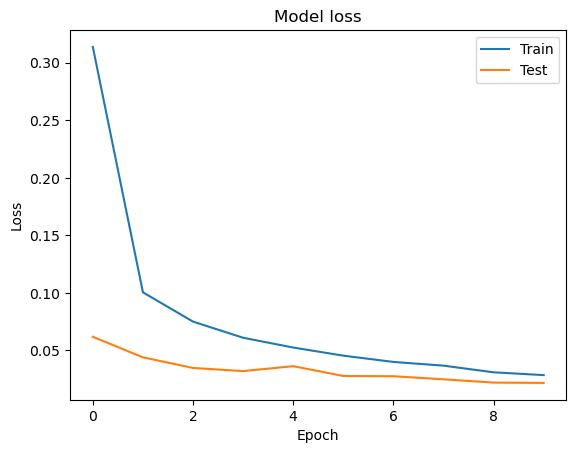

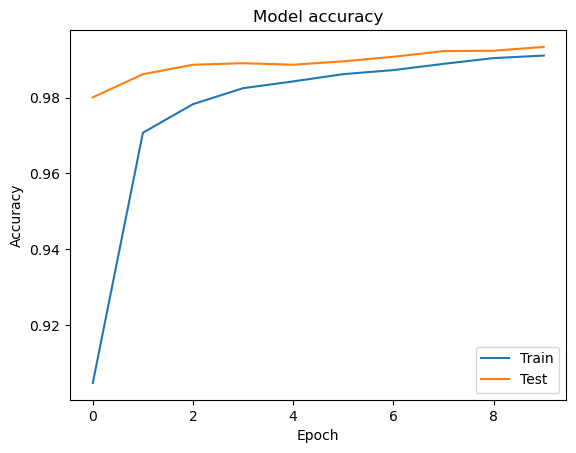

In [17]:
batch_size = 128 # Количество используемых объектов за одну итерацию при обучении
epochs = 10 # Количество периодов обучения

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# 6) Evaluation

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02175869420170784
Test accuracy: 0.993399977684021


In [19]:
model.save('mnist_model.h5')
netron.start('mnist_model.h5')

Serving 'mnist_model.h5' at http://localhost:8080


('localhost', 8080)

# Тапсырма: 
### Жасалған модельдің резлультаттарын шығару
### 1) Classification report 
### 2) Confusion matrix 

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Получение предсказаний модели на тестовых данных
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Получение confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 2s 7ms/step


In [22]:
confusion_mtx

array([[ 975,    0,    0,    0,    0,    0,    3,    1,    0,    1],
       [   0, 1133,    1,    0,    0,    0,    1,    0,    0,    0],
       [   1,    0, 1027,    0,    0,    0,    0,    3,    1,    0],
       [   0,    0,    1, 1005,    0,    1,    0,    1,    2,    0],
       [   0,    0,    0,    0,  980,    0,    1,    0,    0,    1],
       [   1,    0,    0,    5,    0,  883,    2,    1,    0,    0],
       [   2,    2,    0,    0,    1,    2,  951,    0,    0,    0],
       [   0,    2,    3,    0,    0,    0,    0, 1017,    1,    5],
       [   1,    0,    1,    1,    0,    1,    1,    1,  966,    2],
       [   1,    0,    0,    2,    3,    2,    0,    1,    3,  997]],
      dtype=int64)

In [23]:
from sklearn.metrics import classification_report

# Получение classification report на основе confusion matrix
report = classification_report(y_true, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

